### Previsão de Mortes Neonatal

Neste projeto, vamos utilizar dados públicos do SINASC (Sistema de Nascidos Vivos) e do SIM (Sistema de Mortalidade) para construir modelos de aprendizado de máquina capazes de prever o risco de morte neonatal (até 28 dias após o nascimento).

*Alunos:*
- Júlia Moraes
- Luiz Eduardo

#### Imports necessários para o projeto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
import seaborn as sns

#### 1.Datasets

##### 1.1 SINASC - Sistema de Nascidos Vivos 

Inicialmente faremos uma análise no banco de dados do SINASC.

O Governo disponibiliza o [Dicionário de Dados](https://diaad.s3.sa-east-1.amazonaws.com/sinasc/SINASC+-+Estrutura.pdf) referente ao arquivo .csv utilizado. No entanto, neste trabalho serão abordados apenas os campos relevantes para o desenvolvimento do projeto.


In [7]:
sinasc = pd.read_csv(r"SINASC_2023.csv", sep=";")

C:\Users\luize\AppData\Local\Temp\ipykernel_44472\1405332279.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  sinasc = pd.read_csv(r"SINASC_2023.csv", sep=";")


In [8]:
# ver as primeiras 5 linhas 
sinasc.head()

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,...,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2679477.0,110001,1,32.0,2.0,4.0,999992.0,3.0,...,2.0,3.0,2012023.0,6.0,0.0,1,1.0,3,1,5
1,2,1,2679477.0,110001,1,18.0,1.0,4.0,999992.0,NaN,...,2.0,3.0,25012023.0,6.0,0.0,1,1.0,10,0,5
2,3,1,2679477.0,110001,1,15.0,5.0,3.0,999992.0,0.0,...,2.0,3.0,10022023.0,3.0,0.0,1,1.0,6,0,3
3,4,1,2516500.0,110001,1,32.0,2.0,3.0,999992.0,1.0,...,2.0,3.0,18012023.0,3.0,0.0,1,1.0,5,1,5
4,5,1,2516500.0,110001,1,27.0,1.0,5.0,999991.0,0.0,...,2.0,3.0,18012023.0,8.0,0.0,1,1.0,1,0,5


In [9]:
# quantidade de linhas e colunas
sinasc.shape

(2537576, 62)

In [10]:
# informações gerais
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537576 entries, 0 to 2537575
Data columns (total 62 columns):
 #   Column      Dtype  
---  ------      -----  
 0   contador    int64  
 1   ORIGEM      int64  
 2   CODESTAB    float64
 3   CODMUNNASC  int64  
 4   LOCNASC     int64  
 5   IDADEMAE    float64
 6   ESTCIVMAE   float64
 7   ESCMAE      float64
 8   CODOCUPMAE  float64
 9   QTDFILVIVO  float64
 10  QTDFILMORT  float64
 11  CODMUNRES   int64  
 12  GESTACAO    float64
 13  GRAVIDEZ    float64
 14  PARTO       float64
 15  CONSULTAS   float64
 16  DTNASC      int64  
 17  HORANASC    float64
 18  SEXO        int64  
 19  APGAR1      float64
 20  APGAR5      float64
 21  RACACOR     float64
 22  PESO        float64
 23  IDANOMAL    float64
 24  DTCADASTRO  int64  
 25  CODANOMAL   object 
 26  NUMEROLOTE  float64
 27  VERSAOSIST  object 
 28  DTRECEBIM   float64
 29  DIFDATA     int64  
 30  OPORT_DN    int64  
 31  DTRECORIGA  int64  
 32  NATURALMAE  float64
 33  CODMUNN

In [11]:
# remover linhas duplicadas
sinasc.drop_duplicates(inplace=True)

##### 1.2 SIM (Sistema de mortalidade)

In [12]:
sim = pd.read_csv("DO23OPEN.csv", sep=";")

C:\Users\luize\AppData\Local\Temp\ipykernel_44472\3351163625.py:1: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  sim = pd.read_csv("DO23OPEN.csv", sep=";")


In [13]:
#deixando apenas os obitos que ocorreram em 1 mês de vida
sim = sim[sim['IDADE'] < 302]

In [14]:
sim.head()

,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
34,35,1,2,1012023,2150.0,835.0,350400.0,17122022.0,215,1,...,NaN,NaN,2022023.0,3.0,2022023.0,2.0,Q248,S,NaN,NaN
242,243,1,2,1012023,2030.0,823.0,230190.0,1012023.0,105,1,...,NaN,NaN,1032023.0,3.0,5012023.0,2.0,P228,S,NaN,NaN
413,414,1,2,1012023,624.0,835.0,355700.0,30122022.0,201,1,...,NaN,NaN,15022023.0,3.0,9022023.0,2.0,P369,S,NaN,NaN
428,429,1,2,1012023,2300.0,851.0,510760.0,14122022.0,218,2,...,NaN,NaN,20022024.0,9.0,NaN,NaN,Q042,N,NaN,NaN
450,451,1,2,1012023,120.0,841.0,411840.0,31122022.0,201,1,...,NaN,NaN,25032023.0,3.0,25032023.0,1.0,P072,S,NaN,NaN


In [15]:
sim.shape

(25094, 86)

##### 1.5 Linkagem de Sinasc e Sim

In [16]:
#renomeando colunas para facilitar o merge
sinasc.rename(columns={
    'IDADEMAE': 'idade_mae',
    'DTNASC': 'data_nasc',
    'SEXO': 'sexo',
    'CODMUNNASC': 'codmun_res',
    'DTCADASTRO': 'dt_cadastro',
}, inplace=True)

sim.rename(columns={
    'DTOBITO': 'data_obito', 
    'SEXO': 'sexo',
    'CODMUNRES': 'codmun_res',
    'IDADEMAE': 'idade_mae',
    'DTCADASTRO': 'dt_cadastro',
    'DTNASC': 'data_nasc'
}, inplace=True)


In [17]:
#pegando os casos que estão nos dois datasets
matches = pd.merge(
    sinasc,
    sim,
    left_on=['sexo', 'codmun_res', 'idade_mae', 'data_nasc', 'RACACOR'],
    right_on=['sexo', 'codmun_res', 'idade_mae', 'data_nasc', 'RACACOR'],
    suffixes=('_sinasc', '_sim')
)

In [18]:
matches.shape

(14986, 143)

In [19]:
matches.head()

,contador_sinasc,ORIGEM_sinasc,CODESTAB_sinasc,codmun_res,LOCNASC,idade_mae,ESTCIVMAE,ESCMAE_sinasc,CODOCUPMAE,QTDFILVIVO_sinasc,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,29,1,2494299.0,110002,1,26.0,4.0,4.0,354705.0,0.0,...,NaN,NaN,15022023.0,3.0,15022023.0,2.0,P000,S,NaN,NaN
1,441,1,2494299.0,110002,1,33.0,4.0,4.0,512105.0,2.0,...,NaN,NaN,6062023.0,9.0,NaN,NaN,Q249,N,NaN,NaN
2,1723,1,2496046.0,110004,1,24.0,2.0,4.0,999992.0,0.0,...,NaN,NaN,14062023.0,9.0,NaN,NaN,Q000,S,NaN,NaN
3,2338,1,3049450.0,110009,1,25.0,1.0,4.0,621005.0,1.0,...,NaN,NaN,24042023.0,3.0,24042023.0,2.0,P363,NaN,NaN,NaN
4,2591,1,2515768.0,110010,1,28.0,1.0,4.0,999992.0,1.0,...,NaN,NaN,15052023.0,3.0,15052023.0,2.0,Q878,N,NaN,NaN


In [20]:
matches['contador'] = range(len(matches))

In [21]:
matches['contador']

0            0
1            1
2            2
3            3
4            4
         ...  
14981    14981
14982    14982
14983    14983
14984    14984
14985    14985
Name: contador, Length: 14986, dtype: int64

Criando em SINASC uma coluna óbitos

In [22]:
#inicia coluna com 0
sinasc['obitos_1m'] = 0

In [23]:
#marca os que tiveram óbito em 1 mês
sinasc.loc[matches.index, 'obitos_1m'] = 1

In [24]:
sinasc['obitos_1m'].value_counts()

obitos_1m
0    2522590
1      14986
Name: count, dtype: int64

In [25]:
# Seleciona todas as linhas com óbito = 1
obitos_1 = sinasc[sinasc['obitos_1m'] == 1]

# Seleciona o dobro de linhas com óbito = 0 (amostragem aleatória)
n_dobro = 2 * len(obitos_1)
obitos_0 = sinasc[sinasc['obitos_1m'] == 0].sample(n=n_dobro, random_state=42)

# Junta os dois DataFrames
sinasc_balanceado = pd.concat([obitos_1, obitos_0])

In [26]:
sinasc_balanceado['obitos_1m'].value_counts()

obitos_1m
0    29972
1    14986
Name: count, dtype: int64

Limpeza e tratamento do SINASC derivado do match o SIM

In [27]:
# colunas a serem renomeadas
sinasc_balanceado.rename(columns={
    "IDADEMAE": "idade_mae",
    "MESPRENAT": "mes_inicio_prenatal",
    "PARIDADE": "paridade",
    "GRAVIDEZ": "tipo_gravidez",
    "PESO": "peso",
    "SEMAGESTAC": "semanas_gestacao",
    "APGAR1": "apgar_1min",
    "APGAR5": "apgar_5min",
    "IDANOMAL": "anomalia_identificada",
    "PARTO": "tipo_parto",
    "KOTELCHUCK": "indice_kotelchuck",
    "QTDFILVIVO": "qntd_filvivos",
    "QTDFILMORT": "qntd_filmortos",
    "RACACOR": "racacor_bebe",
    "RACACORMAE": "racacor_mae",
    "QTDGESTANT": "num_gestacao",
    "QTDPARTNOR": "partos_normais",
    "QTDPARTCES": "partos_cesareos",
    "CONSPRENAT": "consultas_prenatal",
    "STTRABPART": "parto_induzido",
    "STCESPARTO": "cesarea_antes",
    "ESCMAEAGR1": "escolaridade_mae",
}, inplace=True)


In [28]:
colunas_para_dropar = [
    # Identificadores / controle
    'contador', 'NUMEROLOTE', 'VERSAOSIST', 'OPORT_DN', 'CODANOMAL', 'ORIGEM', "STDNEPIDEM", 'STDNNOVA',
    # Datas irrelevantes
    'data_nasc', 'HORANASC', 'dt_cadastro', 'DTRECEBIM', 'DIFDATA',
    'DTRECORIGA', 'DTDECLARAC', 'DTULTMENST','ESTCIVMAE','CODOCUPMAE',  
    'IDADEPAI', 'TPMETESTIM', 'TPAPRESENT', 'TPNASCASSI', 'TPFUNCRESP',
    'TPDOCRESP', 'CODPAISRES', 'TPROBSON',
    # colunas que se repetem informações
    'GESTACAO', 'CONSULTAS', 'ESCMAE', 'CODESTAB', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'codmun_res','LOCNASC','CODMUNRES',
]

sinasc_balanceado = sinasc_balanceado.drop(columns=colunas_para_dropar)


Criação de colunas para ajudar na previsão de dados

In [29]:
# Apgar crítico ou baixo
sinasc_balanceado['apgar5_baixo'] = (sinasc_balanceado['apgar_5min'] < 7).astype(int)
sinasc_balanceado['apgar1_critico'] = (sinasc_balanceado['apgar_1min'] < 4).astype(int)

In [30]:
# Apgar sem melhoria entre o 1 e 5 minutos
sinasc_balanceado['apgar_sem_melhoria'] = ((sinasc_balanceado['apgar_5min'] - sinasc_balanceado['apgar_1min']) <= 2).astype(int)

In [31]:
#Pré natal inadequado
sinasc_balanceado['prenatal_inadequado'] = sinasc_balanceado['indice_kotelchuck'].isin([1, 2]).astype(int)
sinasc_balanceado['poucas_consultas'] = (sinasc_balanceado['consultas_prenatal'] < 4).astype(int)
sinasc_balanceado['prenatal_tardio'] = (sinasc_balanceado['mes_inicio_prenatal'] > 3).astype(int)

In [32]:
sinasc_balanceado.to_csv("sinasc_balanceado.csv", index=False)

#### 2. Análise dos dados

In [33]:
dataset = pd.read_csv("sinasc_balanceado.csv")

- idade mãe: variação de idade padrão

- consultas_prenatal: 1 - Nenhuma, 2- de 1 a 3, 3- de 4 a 6, 4- 7 e mais, 9- Ignorado 

- mes_inicio_prenatal: número do mês que iniciou o pré-natal

- paridade: 1- Multípara, 0- Nulípara
 
- tipo gravidez: 1- Única, 2- Dupla, 3- Tripla ou mais, 9- Ignorado

- peso: em gramas

- semanas gestação: número de semanas 

- apgar_1min: 00 a 10

- apgar_5min: 00 a 10

- anomalia identificada: -Sim, 2- Não, 9- Ignorado

- tipo parto: 1- Vaginal, 2- Cesário, 9- Ignorado

- indice_kotelchuck: 1- Inadequado, 2- Intermediário, 3-Adequado, 4- Adequado +, 5- Muito intenso, 9- Ignorado

- qntd_filvivos: número de filhos vivos

- qntd_filmortos: número de filhos mortos

- racacor_bebe: 1- Branco, 2-Preto, 3- Amarela, 4- Parda, 5- Indígena

- racacor_mae: 1- Branco, 2-Preto, 3- Amarela, 4- Parda, 5- Indígena

- num_gestação: número de gestações anteriores

- partos_normais: número de partos normais

- partos cesáreos: número de partos cesáreos

- parto induzido: 1- Sim, 2-Não, 3- Não se aplica, 9- Ignorado

- cesarea_antes: 1- Sim, 2-Não, 3- Não se aplica, 9- Ignorado

- escolaridade mãe: Valores: 00 – Sem Escolaridade; 01 – Fundamental I Incompleto; 02 – Fundamental I Completo; 03 – Fundamental II Incompleto; 04 – Fundamental II Completo; 05 – Ensino Médio Incompleto; 06 – Ensino Médio Completo; 07 – Superior Incompleto; 08 – Superior Completo; 09 – Ignorado; 10 – Fundamental I Incompleto ou Inespecífico; 11 – Fundamental II Incompleto ou Inespecífico; 12 – Ensino Médio Incompleto ou Inespecífico.

- apgar5_baixo: 1 – SIM; 0 – NÃO

- apgar_1critico: 1 – SIM; 0 – NÃO

- apgar_sem_melhoria: 1 – SIM; 0 – NÃO 

- prenatal_tardio: 1 – SIM; 0 – NÃO 

- prenatal_inadequado: 1 – SIM; 0 – NÃO 

- poucas_consultas: 1 – SIM; 0 – NÃO 

- obitos_1m:  1 – SIM; 0 – NÃO

Quantos sobreviveram x Quantos morreram

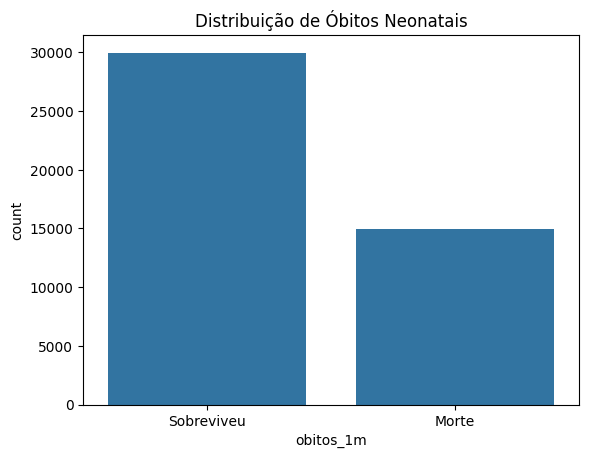

In [34]:
sns.countplot(x='obitos_1m', data=dataset)
plt.xticks([0,1], ['Sobreviveu','Morte'])
plt.title('Distribuição de Óbitos Neonatais')
plt.show()

Raça/cor do bebe x Óbito 

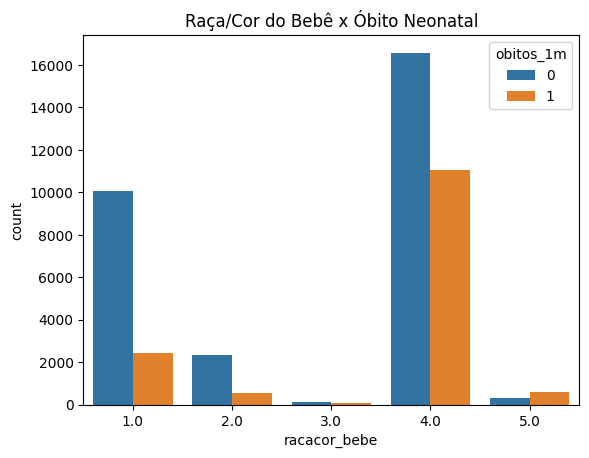

In [35]:
sns.countplot(x='racacor_bebe', hue='obitos_1m', data=dataset)
plt.title('Raça/Cor do Bebê x Óbito Neonatal')
plt.show()

Peso x Óbito

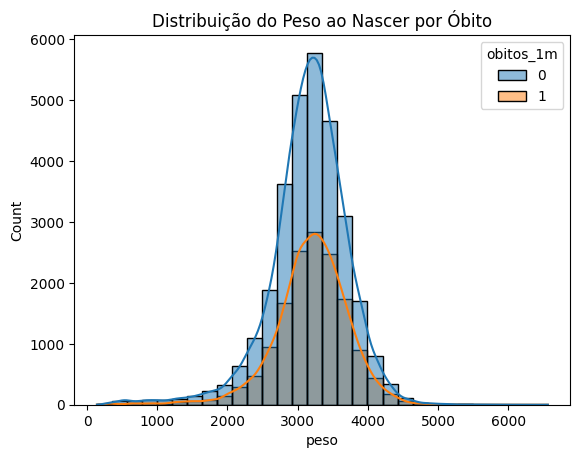

In [36]:
sns.histplot(data=dataset, x='peso', hue='obitos_1m', kde=True, bins=30)
plt.title('Distribuição do Peso ao Nascer por Óbito')
plt.show()

Prematuro x Óbito

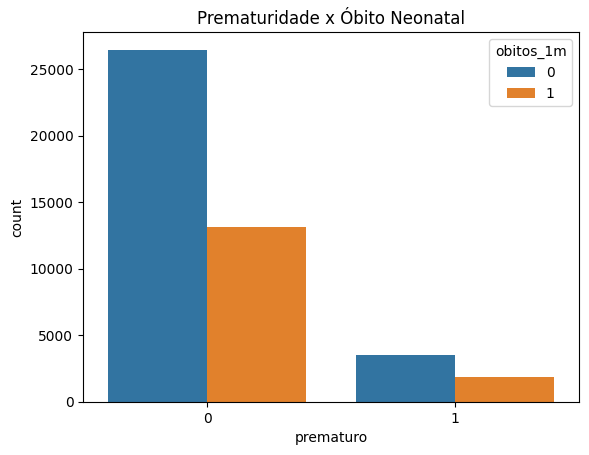

In [37]:
# Criar coluna temporária apenas para o gráfico
dataset_temp = dataset.copy()
dataset_temp['prematuro'] = (dataset_temp['semanas_gestacao'] < 37).astype(int)

# Fazer o gráfico
sns.countplot(x='prematuro', hue='obitos_1m', data=dataset_temp)
plt.title('Prematuridade x Óbito Neonatal')
plt.show()

Apgar x Óbito

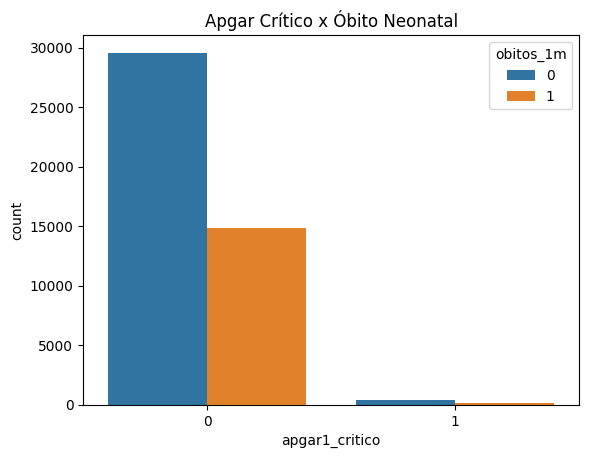

In [38]:
sns.countplot(x='apgar1_critico', hue='obitos_1m', data=dataset)
plt.title('Apgar Crítico x Óbito Neonatal')
plt.show()

Idade Materna x Óbito

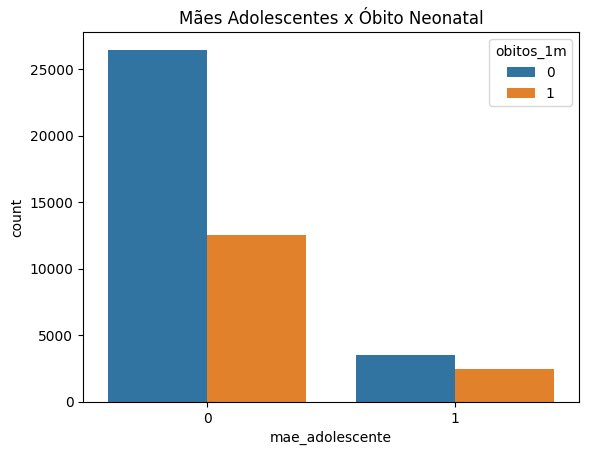

In [39]:
# Criar coluna temporária apenas para o gráfico
dataset_temp = dataset.copy()
dataset_temp['mae_adolescente'] = (dataset_temp['idade_mae'] < 20).astype(int)

# Fazer o gráfico
sns.countplot(x='mae_adolescente', hue='obitos_1m', data=dataset_temp)
plt.title('Mães Adolescentes x Óbito Neonatal')
plt.show()

Impacto Pré-Natal x Óbito

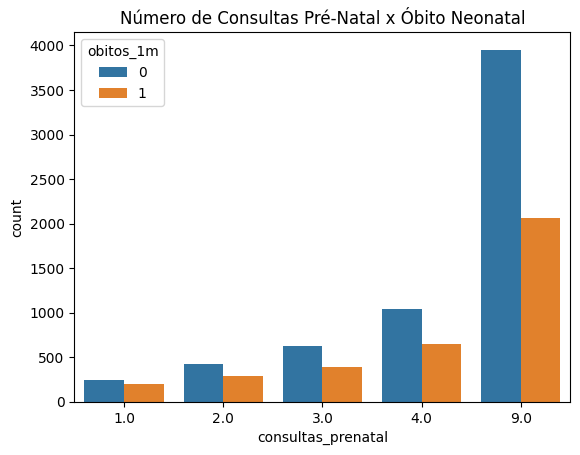

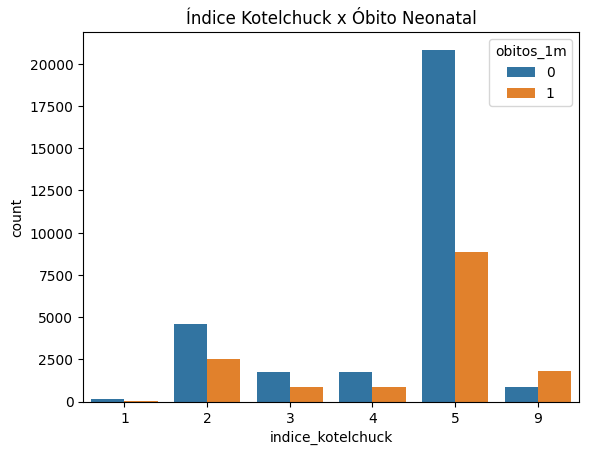

In [40]:
# Criar dataset temporário com limpeza apenas para o gráfico
dataset_temp = dataset.copy()
dataset_temp = dataset_temp[dataset_temp['consultas_prenatal'].isin([1, 2, 3, 4, 9])]

sns.countplot(x='consultas_prenatal', hue='obitos_1m', data=dataset_temp)
plt.title('Número de Consultas Pré-Natal x Óbito Neonatal')
plt.show()

sns.countplot(x='indice_kotelchuck', hue='obitos_1m', data=dataset)
plt.title('Índice Kotelchuck x Óbito Neonatal')
plt.show()

Tipo de Parto x Óbito

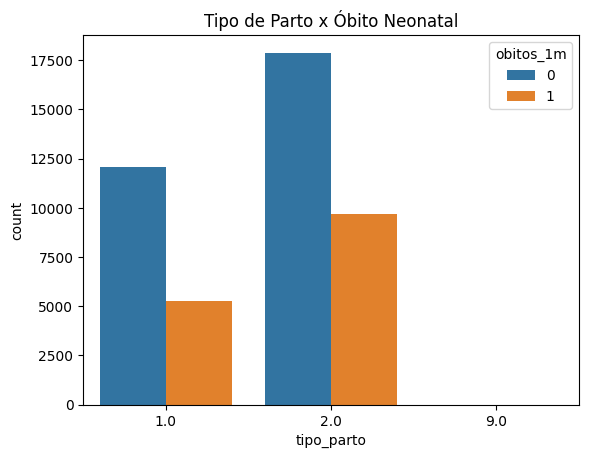

In [41]:
sns.countplot(x='tipo_parto', hue='obitos_1m', data=dataset)
plt.title('Tipo de Parto x Óbito Neonatal')
plt.show()

Matriz de Calor

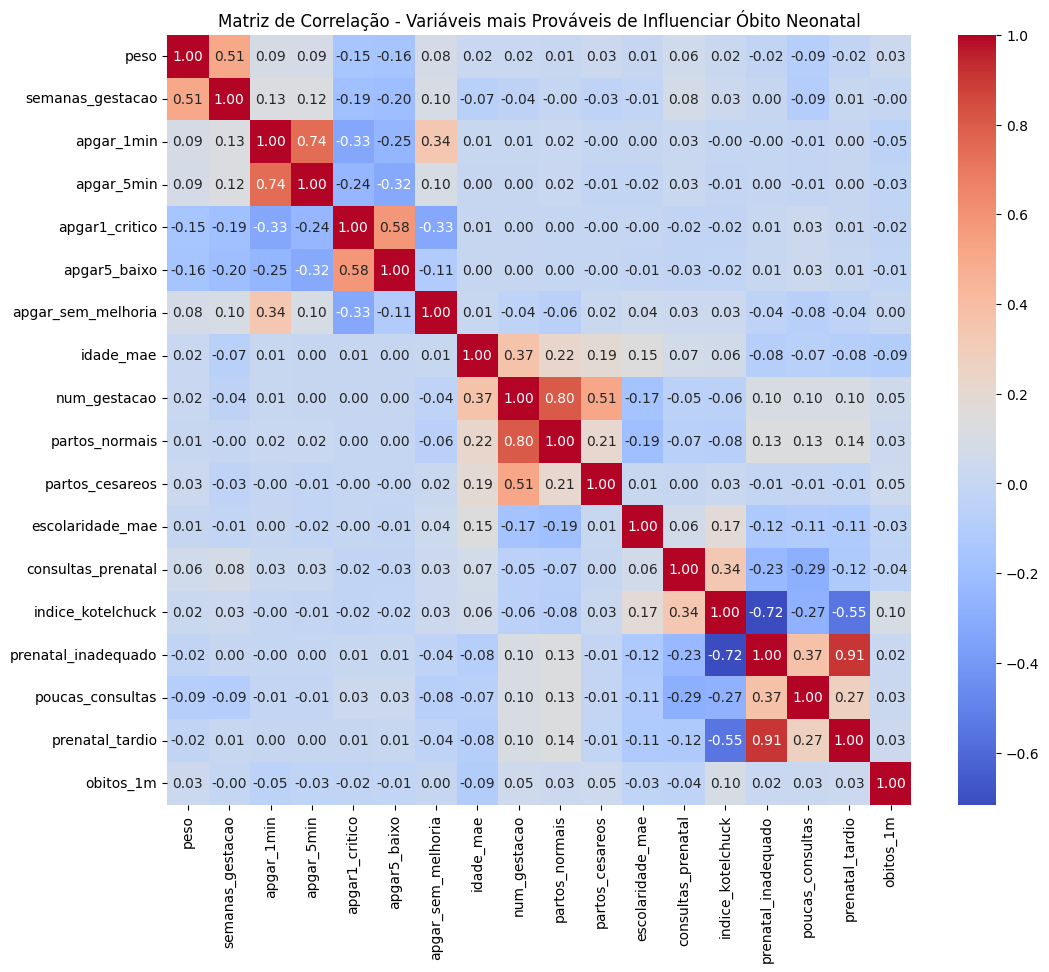

In [42]:
variaveis = [
    'peso', 'semanas_gestacao',
    'apgar_1min', 'apgar_5min', 'apgar1_critico', 'apgar5_baixo', 'apgar_sem_melhoria',
    'idade_mae',
    'num_gestacao', 'partos_normais', 'partos_cesareos',
    'escolaridade_mae', 'consultas_prenatal', 'indice_kotelchuck',
    'prenatal_inadequado', 'poucas_consultas', 'prenatal_tardio',
    'obitos_1m'
]

df_corr = dataset[variaveis]

# Matriz de correlação
corr = df_corr.corr()

# Plotar heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação - Variáveis mais Prováveis de Influenciar Óbito Neonatal")
plt.show()


Verificando se idade_mãe segue uma normal

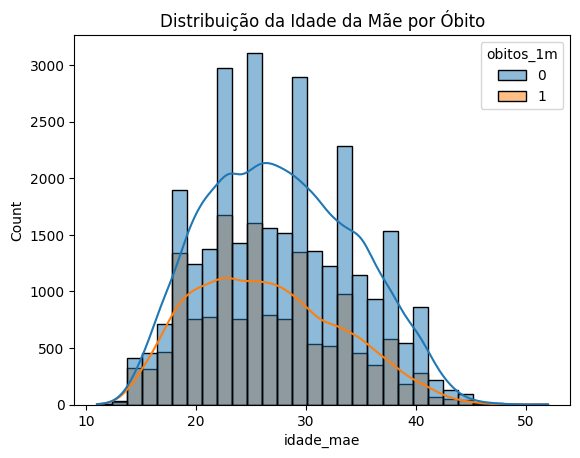

In [43]:
sns.histplot(data=dataset, x='idade_mae', hue='obitos_1m', kde=True, bins=30)
plt.title('Distribuição da Idade da Mãe por Óbito')
plt.show()

In [44]:
print(dataset['idade_mae'].skew())

0.24132267680776684
